In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import graphviz as gv
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 

In [5]:
pd.options.display.max_columns = 50
sns.set_style('darkgrid')

# Ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/home/omo/Desktop/Data Science/Recess/Geoff/heart_disease.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [12]:
# To show the percentages of male and female

count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])

print('Percentage of female patients: {:.2f}%'.format(count_female / (len(df.sex) )* 100))
print('Percentage of male patients: {:.2f}%'.format(count_male / (len(df.sex) )* 100))

Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [13]:
X = df.drop('target',axis=1)

In [14]:
y = df['target']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [16]:
X.shape

(1025, 13)

In [17]:
y.shape

(1025,)

In [22]:
X_train.shape,X_test.shape

((717, 13), (308, 13))

In [23]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
335,58,1,0,150,270,0,0,111,1,0.8,2,0,3
531,65,0,2,155,269,0,1,148,0,0.8,2,0,2
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2
167,57,0,0,120,354,0,1,163,1,0.6,2,0,2
781,58,1,0,146,218,0,1,105,0,2.0,1,1,3


In [25]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
score = accuracy_score(y_test,predictions)

In [31]:
score

0.8246753246753247

In [32]:
# predicting classes

In [45]:
y_predicted_labels = model.predict(X_train)
y_predicted_labels 

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [48]:
# print the training set of accuracy score 
print('Training set of accuracy score: {0:0.4f}'.format(model.score(X_train, y_train)))
print('Testing set of accuracy score: {0:0.4f}'.format(model.score(X_test, y_test)))


Training set of accuracy score: 0.8466
Testing set of accuracy score: 0.8247


#### Visualizations of Decision Tree Models

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 717\nvalue = [351, 366]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.376\nsamples = 367\nvalue = [275, 92]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.5\nsamples = 165\nvalue = [85, 80]'),
 Text(0.0625, 0.125, 'gini = 0.386\nsamples = 92\nvalue = [24, 68]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 73\nvalue = [61, 12]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.112\nsamples = 202\nvalue = [190, 12]'),
 Text(0.3125, 0.125, 'gini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.4375, 0.125, 'gini = 0.071\nsamples = 189\nvalue = [182, 7]'),
 Text(0.75, 0.625, 'x[12] <= 2.5\ngini = 0.34\nsamples = 350\nvalue = [76, 274]'),
 Text(0.625, 0.375, 'x[0] <= 55.5\ngini = 0.243\nsamples = 269\nvalue = [38, 231]'),
 Text(0.5625, 0.125, 'gini = 0.092\nsamples = 166\nvalue = [8, 158]'),
 Text(0.6875, 0.125, 'gini = 0.413\nsamples = 103\nvalue = [30, 73]'),
 Text(0.875, 0.375, 'x[7] <= 142.5\ngini = 0.498\nsamples = 81\nvalue = [38, 4

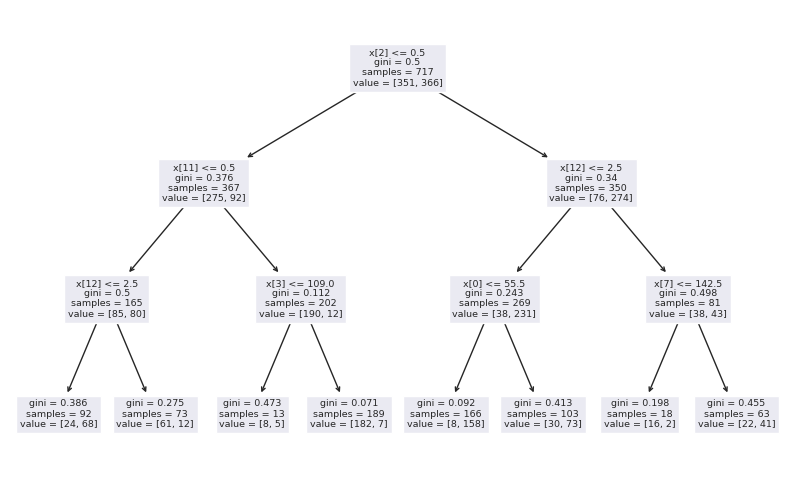

In [54]:
#first way
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
from sklearn import tree
tree.plot_tree(model.fit(X_train, y_train))

In [60]:
# second way 
import graphviz
class_names = df['target'].unique().astype(str) # getting the class names from the dataset

In [61]:
class_names

array(['0', '1'], dtype='<U21')

In [62]:
# Generating the graphviz visualization file
tree.export_graphviz(model,out_file='heart_disease2.dot',
                     feature_names=X.columns,
                     class_names = class_names,
                     label = 'all',
                     filled = True,
                     rounded = True,
                                   )